# Prediction using Decision Tree Algorithm

### Author : Sakshi Maharana

###### THE SPARKS FOUNDATION GRIPFEB'21

TASK#6 : 
    
    ● Create the Decision Tree classifier and visualize it graphically.
    ● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
    
DATA GIVEN :

    1. Dataset used from : https://bit.ly/3kXTdox
    2. One .csv file provided : 'Iris.csv'
    3. Tool Used : Python.
    
STEPS TAKEN :

        1. Import Libraries
        2. Data Sourcing and Understanding
        3. Exploratory Data Analysis
        4. Feature Engineering
        5. Train-Test split of data
        6. Model Building and 
        7. Visualization of Decision Tree Classifier
        8. Model Evaluation
        9. Summary
               
Let's Begin!!!

NOTE : Following are the required installation : 

In [1]:
# pip install six
# from six import StringIO
# pip install pydotplus

#### Step 1 : Import Libraries

In [2]:
#import libraries

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#numpy and pandas
import pandas as pd
import numpy as np

#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

#for generating decision tree
from six import StringIO   
from sklearn.tree import export_graphviz

#for plotting decision tree
from IPython.display import Image 
import pydotplus

In [3]:
#setting 50 rows & columns to show in the output clearly
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [4]:
# if loading the iris dataset directly
# import sklearn.datasets as datasets
# iris = datasets.load_iris()

#### Step 2 : Data Sourcing and Understanding

In [5]:
#building dataframe
iris = pd.read_csv(r".\Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#shape of dataframe
iris.shape

(150, 6)

In [7]:
#gathering info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#checking outliers for numeric features
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#Species column is the target variable
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
#id is an unwanted column, dropping it
iris.drop(['Id'], axis = 1, inplace = True)

In [11]:
#getting columns
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##### Step 3 : Exploratory Data Analysis

###### Feature Correlation :-

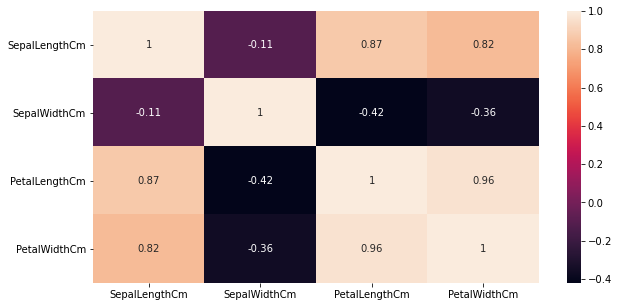

In [12]:
#corelation matrix
plt.figure(figsize=(10, 5), frameon='True')

cor = iris.corr()
sns.heatmap(cor, annot=True)

plt.show()

###### Univariate Analysis :-

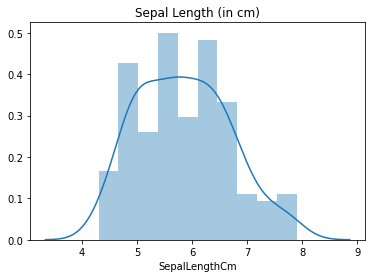

In [13]:
#plotting SepalLengthCm
plt.title('Sepal Length (in cm)')

sns.distplot(iris['SepalLengthCm'], bins=10)
plt.show()

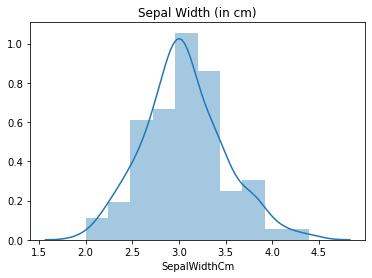

In [14]:
#plotting SepalWidthCm
plt.title('Sepal Width (in cm)')

sns.distplot(iris['SepalWidthCm'], bins=10)
plt.show()

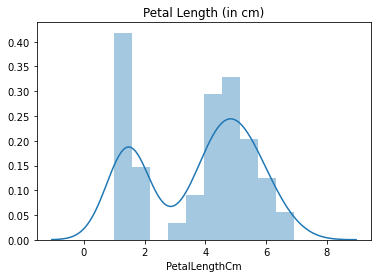

In [15]:
#plotting PetalLengthCm
plt.title('Petal Length (in cm)')

sns.distplot(iris['PetalLengthCm'], bins=10)
plt.show()

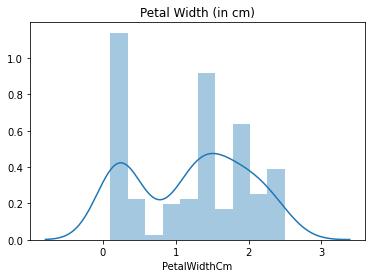

In [16]:
#plotting PetalWidthCm
plt.title('Petal Width (in cm)')

sns.distplot(iris['PetalWidthCm'], bins=10)
plt.show()

###### Multivariate Analysis :-

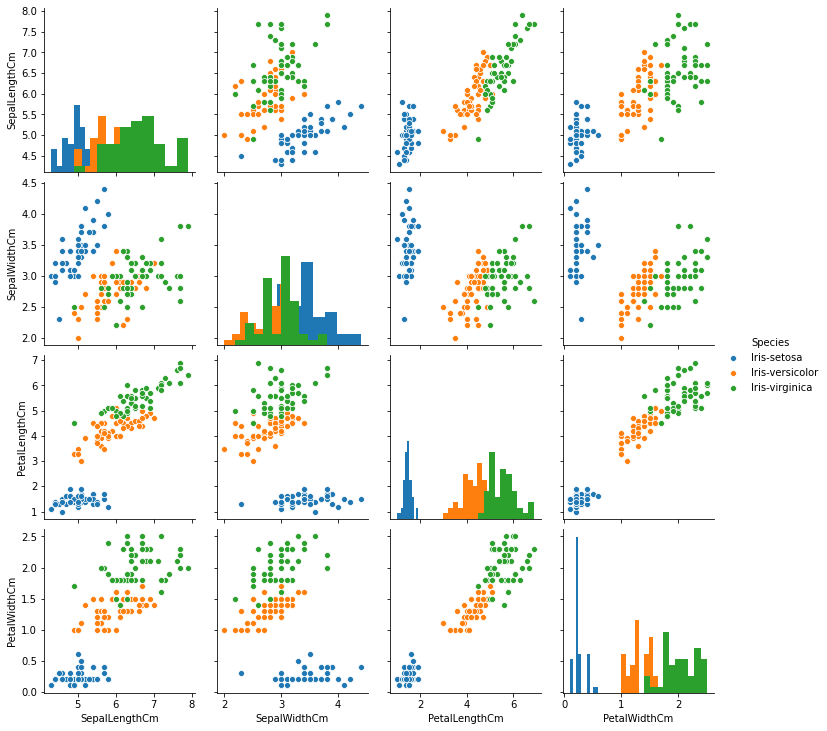

In [17]:
sns.pairplot(iris, hue = "Species", diag_kind = "hist")

#### Step 4 : Feature Engineering

In [18]:
#create X and y
X = iris.drop(['Species'], axis = 1)
y = iris['Species']

In [19]:
X.shape

(150, 4)

In [20]:
y.shape

(150,)

In [21]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [22]:
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Step 5 : Train-Test split of the data

In [23]:
#split dataset into 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
X_train.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [25]:
X_test.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [26]:
y_train.head(5)

91     Iris-versicolor
135     Iris-virginica
69     Iris-versicolor
128     Iris-virginica
114     Iris-virginica
Name: Species, dtype: object

In [27]:
y_test.head(5)

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

#### Step 6 : Model Building

In [28]:
#decision tree classifier
dtree = DecisionTreeClassifier()

#model fit
dtree.fit(X_train,y_train)

#if fitted
print("Decision Tree Classifier Generated Successfully!!!")

Decision Tree Classifier Generated Successfully!!!


In [29]:
#predict
dtree.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Step 7 : Visualization of Decision Tree Classifier

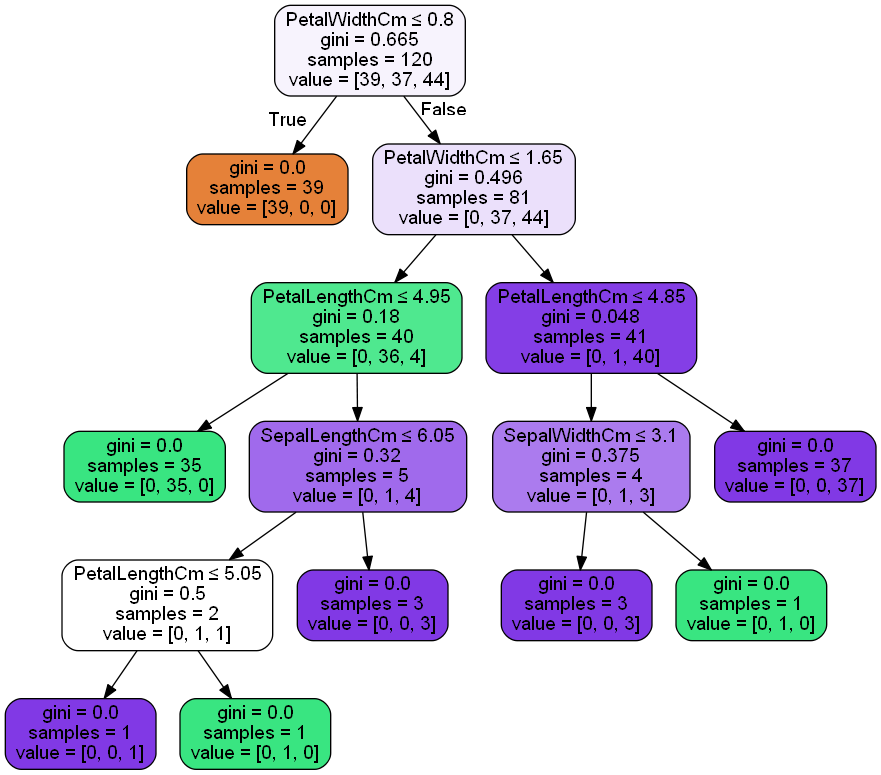

In [30]:
# Visualize the graph

#input-output of the data
dot_data = StringIO()

#get all features together
features = X.columns

#export the tree
export_graphviz(dtree, out_file = dot_data, 
                feature_names = features,
                filled = True, rounded = True,
                special_characters = True)

#plot the tree
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#image file name
graph.write_png('iris.png')

#create image
Image(graph.create_png())

##### fig 1 : This is a decision tree which shows that if we feed any test data to this classifier, it would be able to predict the right class accordingly.

#### Step 8 : Model Evaluation

In [31]:
#making Predictions
y_pred = dtree.predict(X_test)

#Printing classification report
print('Classification Report :\n')
print(classification_report(y_test, y_pred))

#accuracy
print('\nAcuracy Score :', accuracy_score(y_test, y_pred))

Classification Report :

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30


Acuracy Score : 0.9666666666666667


In [32]:
#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm)

TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity : ', TN / float(TN+FP))

Confusion Matrix : 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Sensitivity :  1.0
Specificity :  1.0


#### Summary

1. DECISION TREE CLASSIFIER : 
    
    1. Accuracy : 0.97
    2. Specificity : 1.0
    3. Sensivity : 1.0
    
2. Fig 1 shows that the Decision Tree classifier has been successfully classified and visualized it graphically.
3. The purpose was solved, which is, if we feed any new data to this classifier, it would be able to predict the right class accordingly, as accuracy tends to be 0.97